In [15]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [21]:

imageDir = "/Users/alexverbesey/Desktop/MRI_project/data"

# Subdirectories for datasets
datasets = ['Testing', 'Training']

for dataset in datasets:
    dataset_path = os.path.join(imageDir, dataset)
    if not os.path.isdir(dataset_path):
        continue  # Skip if the dataset directory does not exist
    print(f"\nDataset: {dataset}")
    print(f"")
    
    # Get all tumor type directories within the dataset directory
    tumor_types = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]
    for tumor_type in tumor_types:
        tumor_path = os.path.join(dataset_path, tumor_type)
        
        # List all files (images) in the tumor type directory
        images = [f for f in os.listdir(tumor_path) if os.path.isfile(os.path.join(tumor_path, f))]
        num_images = len(images)
        
        print(f"  Tumor Type: {tumor_type}, Number of images: {num_images}")
        print(f"")


Dataset: Testing

  Tumor Type: pituitary, Number of images: 300

  Tumor Type: notumor, Number of images: 405

  Tumor Type: glioma, Number of images: 300

  Tumor Type: meningioma, Number of images: 306


Dataset: Training

  Tumor Type: pituitary, Number of images: 1457

  Tumor Type: notumor, Number of images: 1595

  Tumor Type: glioma, Number of images: 1321

  Tumor Type: meningioma, Number of images: 1339




Dataset: Testing
  Tumor Type: pituitary, Number of images: 300
  Tumor Type: notumor, Number of images: 405
  Tumor Type: glioma, Number of images: 300
  Tumor Type: meningioma, Number of images: 306


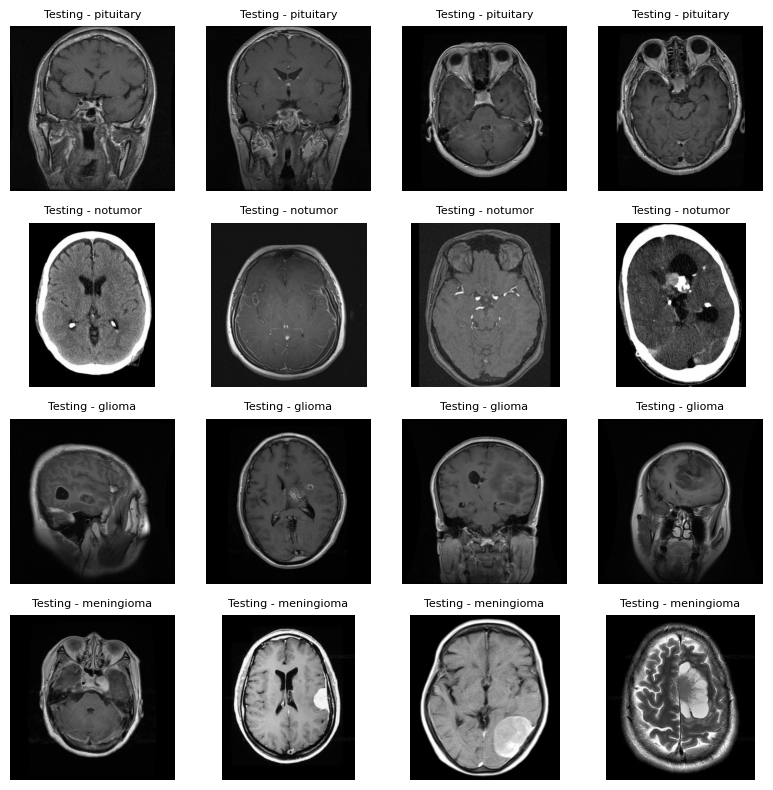

In [32]:
# Collect sample images and their labels
sample_images = []
labels = []

for dataset in datasets:
    dataset_path = os.path.join(imageDir, dataset)
    if not os.path.isdir(dataset_path):
        print(f"Dataset directory not found: {dataset_path}")
        continue  # Skip if the dataset directory does not exist
    print(f"\nDataset: {dataset}")
    
    # Get all tumor type directories within the dataset directory
    tumor_types = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]
    for tumor_type in tumor_types:
        tumor_path = os.path.join(dataset_path, tumor_type)
        
        # List all files (images) in the tumor type directory
        images = [f for f in os.listdir(tumor_path) if os.path.isfile(os.path.join(tumor_path, f))]
        num_images = len(images)
        
        print(f"  Tumor Type: {tumor_type}, Number of images: {num_images}")
        
        if num_images == 0:
            print(f"  No images found in {tumor_path}")
            continue  # Skip to the next tumor type if no images are found
        
        # Add up to 4 sample images from each tumor type
        for image_file in images[:4]:
            image_path = os.path.join(tumor_path, image_file)
            sample_images.append(image_path)
            labels.append(f"{dataset} - {tumor_type}")
            
            # Break if we have collected 16 images
            if len(sample_images) >= 16:
                break
        if len(sample_images) >= 16:
            break
    if len(sample_images) >= 16:
        break

# Display images in a 4x4 grid
fig, axes = plt.subplots(4, 4, figsize=(8, 8))  # Adjust figsize to make images smaller or larger
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

for idx, ax in enumerate(axes):
    if idx < len(sample_images):
        image_path = sample_images[idx]
        img = mpimg.imread(image_path)
        ax.imshow(img, cmap='gray')
        ax.set_title(labels[idx], fontsize=8)
        ax.axis('off')
    else:
        ax.axis('off')  # Hide any unused subplots

plt.tight_layout()
plt.show()